In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plot data, visualizations
import seaborn as sns

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn import metrics  # For metrics like silhouette coefficient
from sklearn.cluster import KMeans, AgglomerativeClustering # For clustering
from sklearn.decomposition import PCA # For Principal Component Analysis

import sys
import os
print(os.listdir("D:\DataScience@DKB"))


['Clustering_IRIS.ipynb', 'Clustering_IRIS_Data.ipynb', 'ClustHW_Iris.txt', 'Einsteiger-Kurs 2.pdf', 'Iris.csv', 'Rolling_Dice_LoLN.ipynb']


In [2]:
#load iris data and print first 5 rows
df = pd.read_csv('D:\DataScience@DKB/Iris.csv')
#adjust data to process (obejct to float64)
df['Sepal.Width'] = pd.to_numeric(df['Sepal.Width'].str.replace(',','.'))
df['Sepal.Length'] = pd.to_numeric(df['Sepal.Length'].str.replace(',','.'))
df['Petal.Width'] = pd.to_numeric(df['Petal.Width'].str.replace(',','.'))
df['Petal.Length'] = pd.to_numeric(df['Petal.Length'].str.replace(',','.'))
print(df.head(5))

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [10]:
#create new features derived from the old, and add it to the dataframe
df = df.assign(SWmpSL= df['Sepal.Width']*df['Sepal.Length'])
df = df.assign(PWmpPL= df['Petal.Width']*df['Petal.Length'])
df = df.assign(SWsq= np.power(df['Sepal.Width'],2))
df = df.assign(PLsq= np.power(df['Petal.Length'],2))
print(df.head(5))

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  SWmpSL  \
0           5.1          3.5           1.4          0.2  setosa   17.85   
1           4.9          3.0           1.4          0.2  setosa   14.70   
2           4.7          3.2           1.3          0.2  setosa   15.04   
3           4.6          3.1           1.5          0.2  setosa   14.26   
4           5.0          3.6           1.4          0.2  setosa   18.00   

   PWmpPL   SWsq  PLsq  
0    0.28  12.25  1.96  
1    0.28   9.00  1.96  
2    0.26  10.24  1.69  
3    0.30   9.61  2.25  
4    0.28  12.96  1.96  


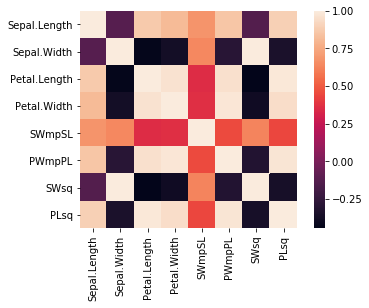

In [12]:
#make correlation heatmap using seaborn lib
#subset the data
df1 = df[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width','SWmpSL','PWmpPL','SWsq','PLsq']]
#print(df1)
#calculate correlations between dimensions
cor = df1.corr()
#print(cor)
#print(sns.__version__)
#show heatmap with correlations
sns.heatmap(cor, square = True)
plt.show()

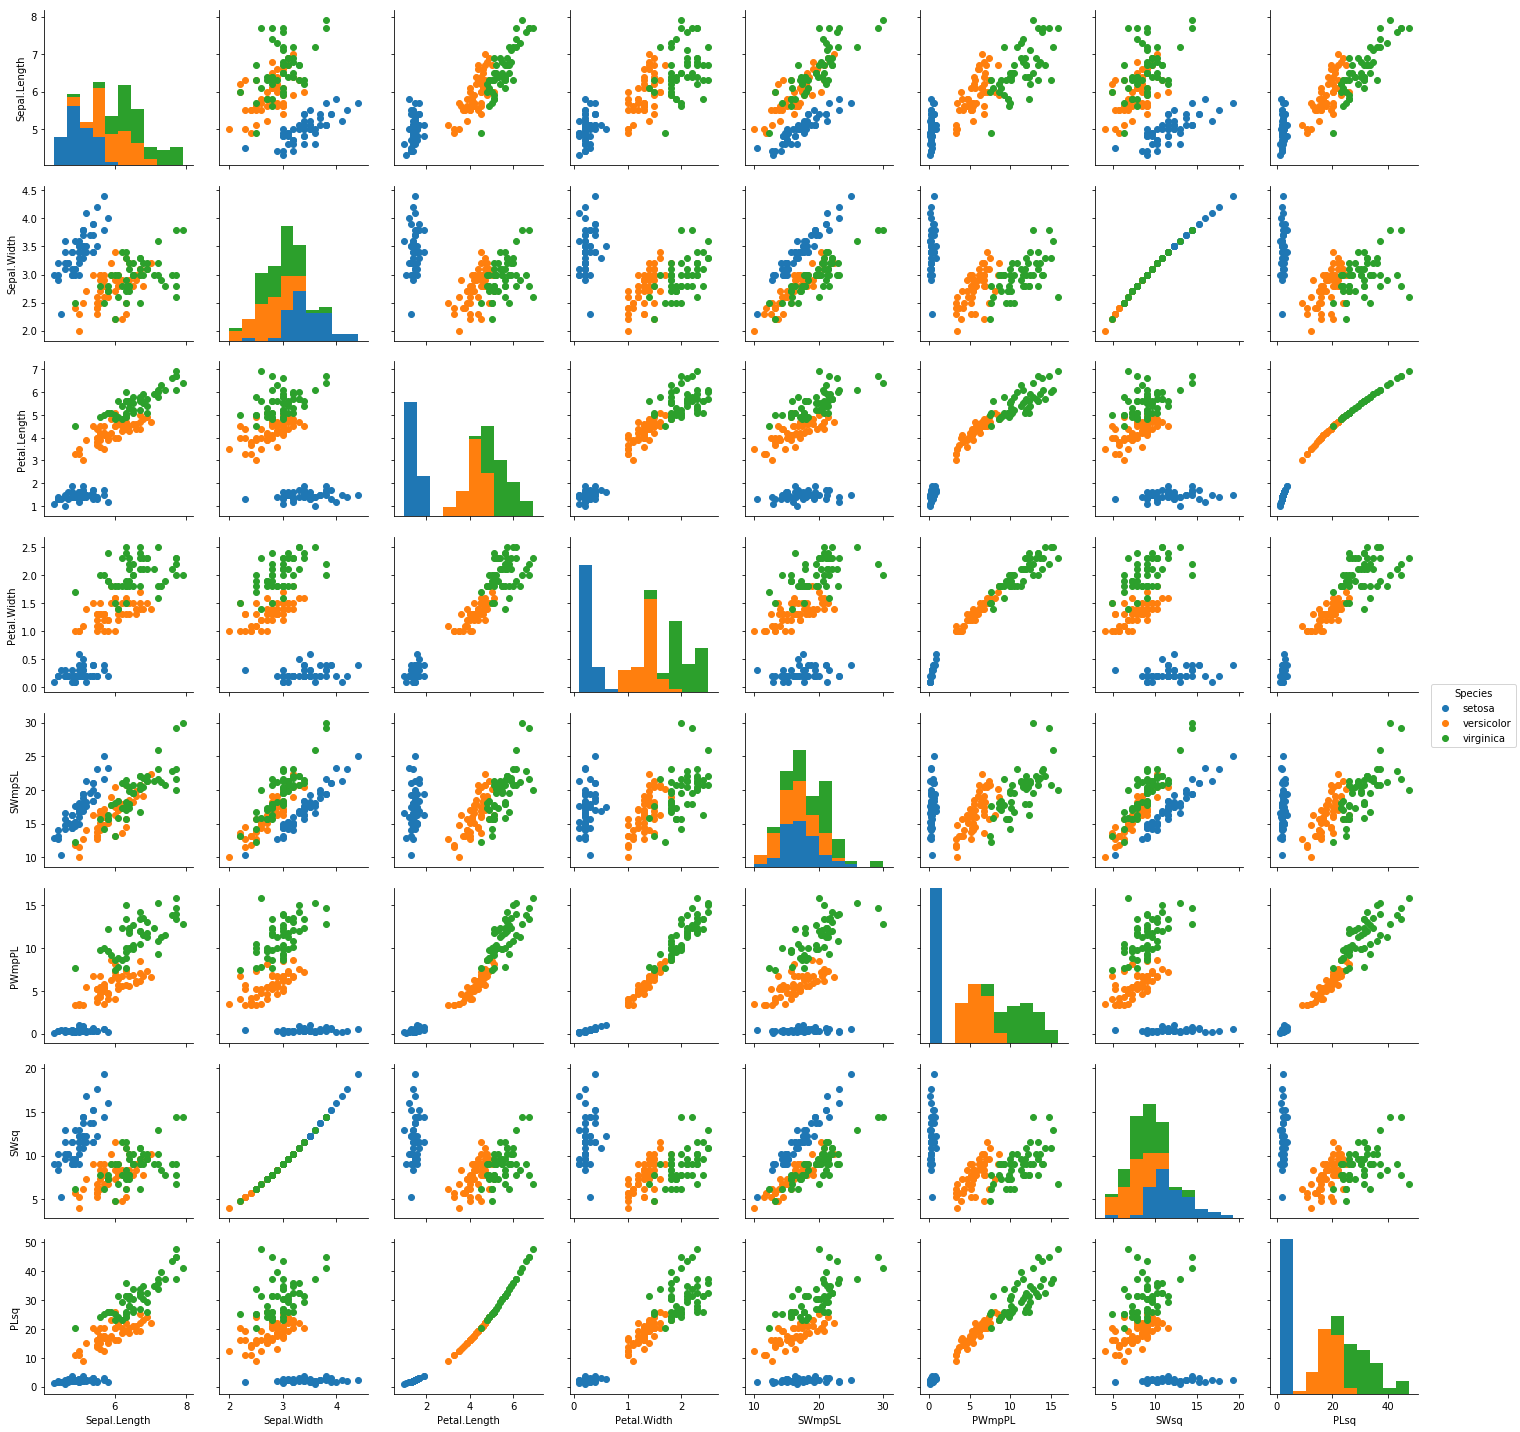

In [13]:
#plot pairwise relationships in a dataset
g = sns.PairGrid(df, hue='Species')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

In [17]:
#scaling/normalize the data (PCA is very sensitive to outliers)
scaler = StandardScaler()
sc_data = scaler.fit_transform(df1)
print(sc_data.shape)
print(sc_data)

(150, 8)
[[-0.90068117  1.01900435 -1.34022653 ..., -1.17404107  0.99432893
  -1.21241227]
 [-1.14301691 -0.13197948 -1.34022653 ..., -1.17404107 -0.19637447
  -1.21241227]
 [-1.38535265  0.32841405 -1.39706395 ..., -1.17829941  0.25792467
  -1.23386659]
 ..., 
 [ 0.79566902 -0.13197948  0.8195957  ...,  0.98068362 -0.19637447
   0.78045488]
 [ 0.4321654   0.78880759  0.93327055 ...,  1.41077689  0.74153344
   0.94891095]
 [ 0.06866179 -0.13197948  0.76275827 ...,  0.72092432 -0.19637447
   0.69861065]]


In [24]:
#apply PCA to the extended IRIS dataset (use 2 components)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(sc_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

print(principalDf.head(5))

   principal component 1  principal component 2
0              -2.894172               0.905020
1              -2.739596              -0.996817
2              -3.017198              -0.467204
3              -2.951878              -0.883534
4              -3.022082               1.184777


In [32]:
#show the explained variance of the two PCs
#variance of 3 PCs 0.6457265 ,  0.31993402,  0.02546454
pca.explained_variance_ratio_

array([ 0.6457265 ,  0.31993402])

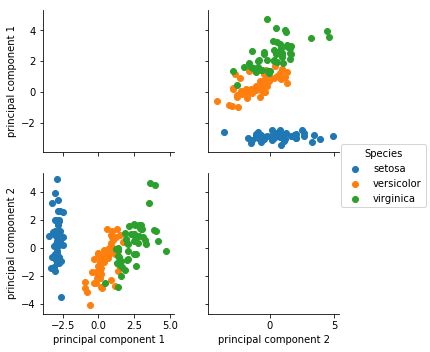

In [33]:
#visualize the PCAs
#add target variable (Species)
vis_pca_Df = pd.concat([principalDf, df[['Species']]], axis = 1)

g = sns.PairGrid(vis_pca_Df, hue='Species')
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()